# Diterpene Project

### **Group 5**: Galynskaia Olesia,  Park Yeongshin,  Chalissery Julia

#### 1. Load Data

In [1]:
import pandas as pd

In [2]:
filepath = "/Users/park/Downloads/diterpene_shuf.csv"
Data = pd.read_csv(filepath)
Data = Data.drop(columns=['a0', 'a1', 'a2', 'a3'])

Data.head()

,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,v1493,t,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,d,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,t,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,d,154.6,t,18.7,t,37.1,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


#### 2. Visualization

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [4]:
frequency = [col for col in Data.columns if col.startswith('a') and col != Data.columns[-1] and int(col[1:]) >= 6 and int(col[1:]) % 2 == 0]
multiplicity = [col for col in Data.columns if col.startswith('a') and col != Data.columns[-1] and int(col[1:]) >= 5 and int(col[1:]) % 2 != 0]

frequencies = Data[frequency]
multiplicities = Data[multiplicity]

print(frequencies.shape)
print(multiplicities.shape)

(1202, 20)
(1202, 20)


2-1. Histograms of Frequencies

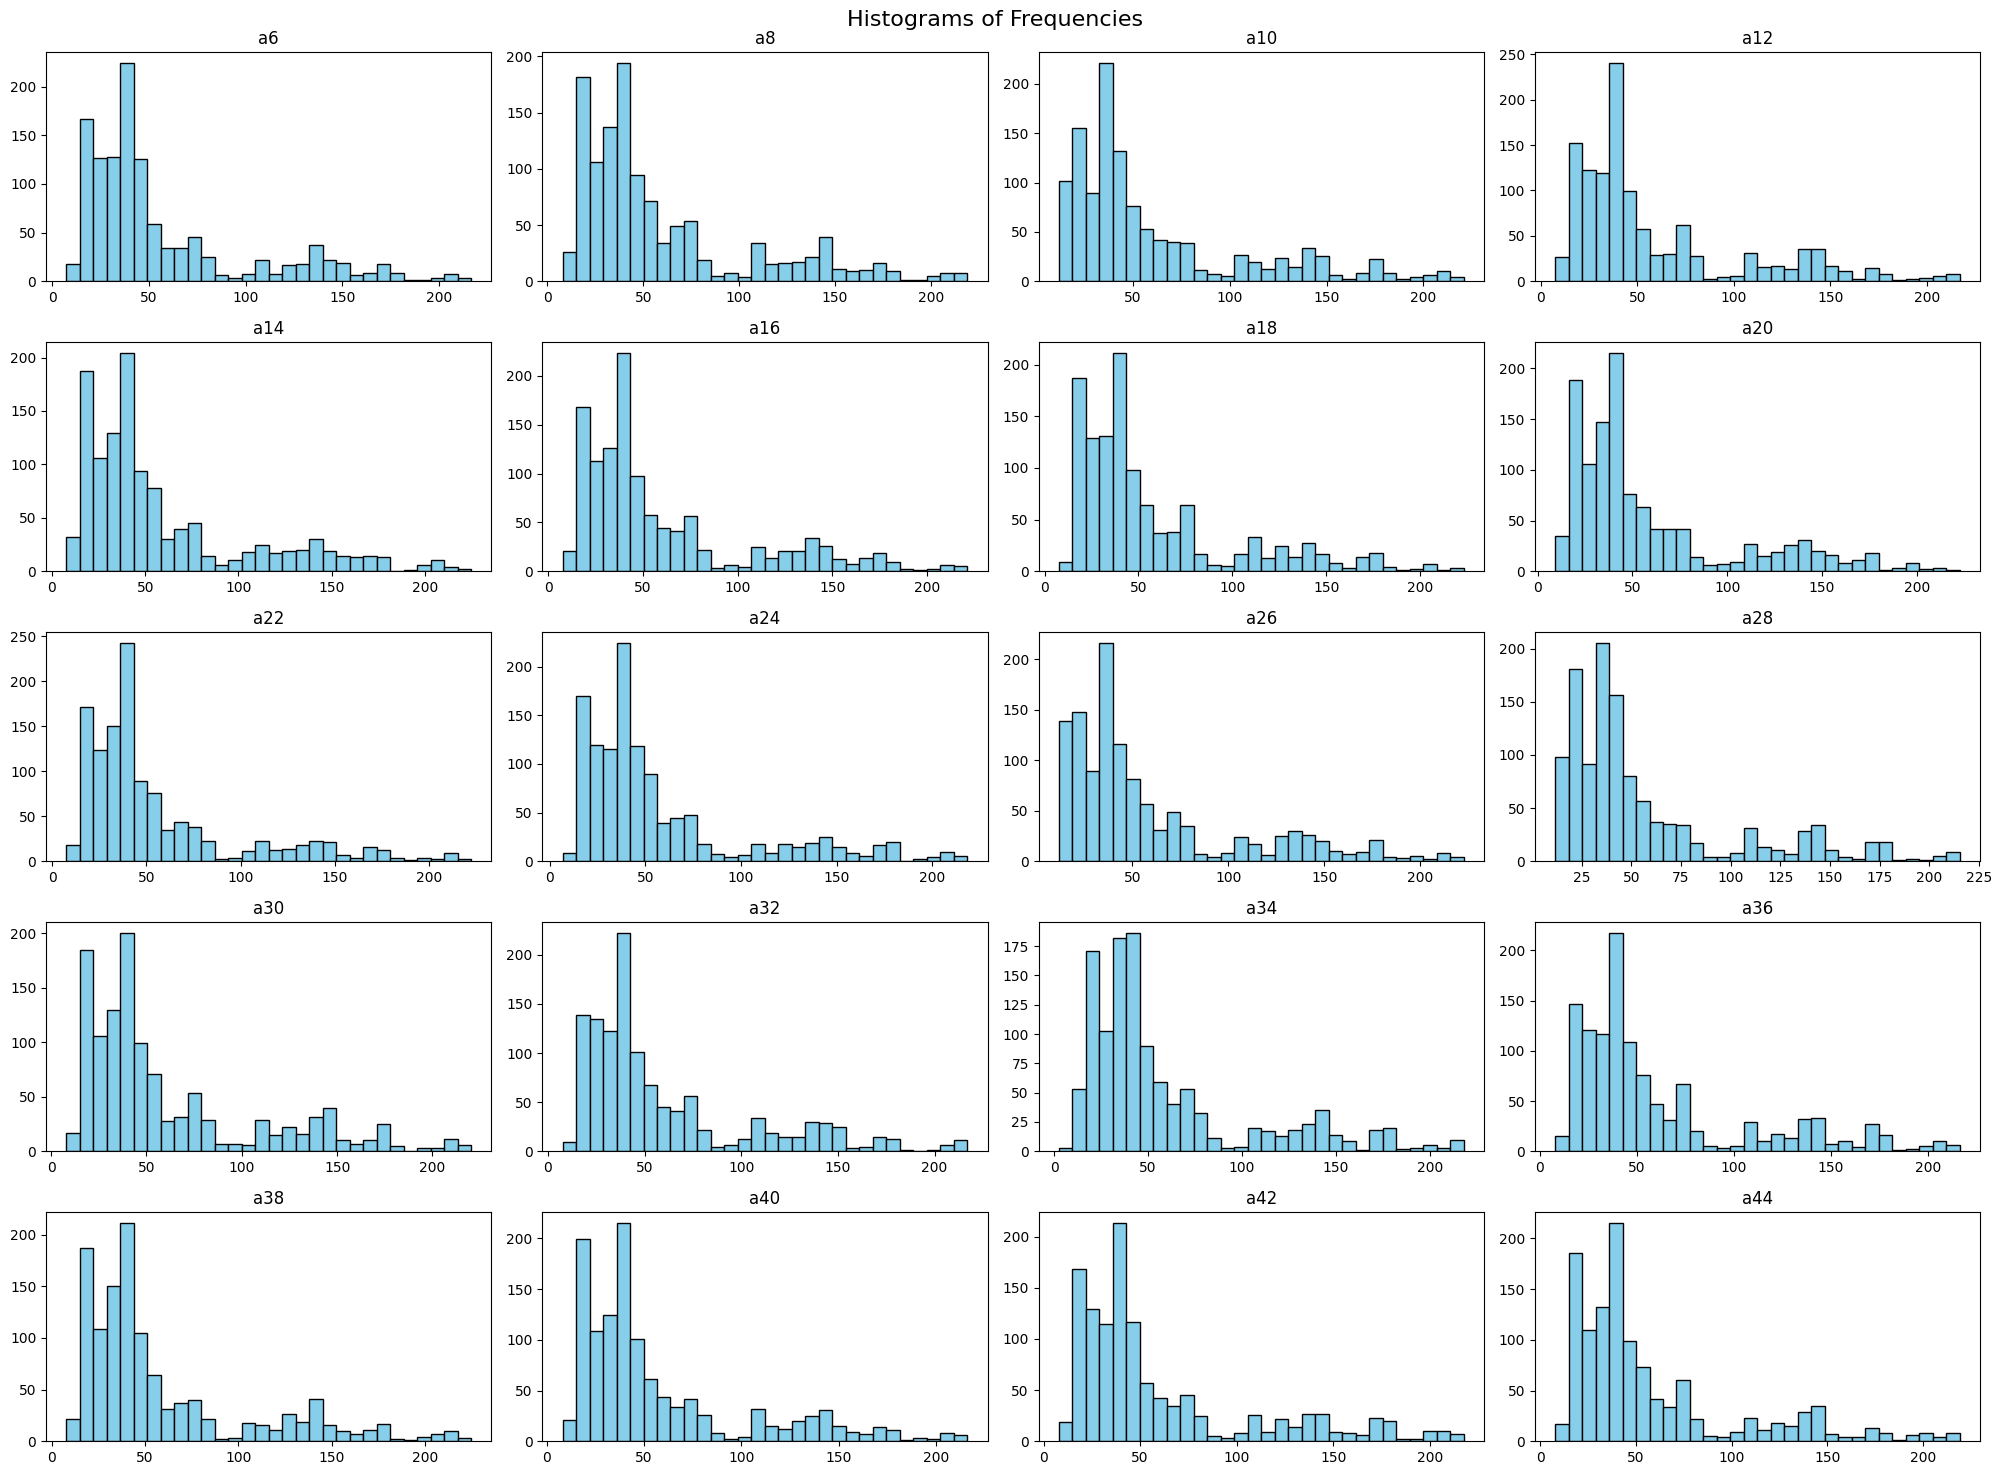

In [6]:
frequencies.hist(bins=30, figsize=(20, 15), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Frequencies', fontsize=16)
plt.tight_layout()
plt.show()

2-2. Frequency of Each Multiplicity

<Figure size 1200x600 with 0 Axes>

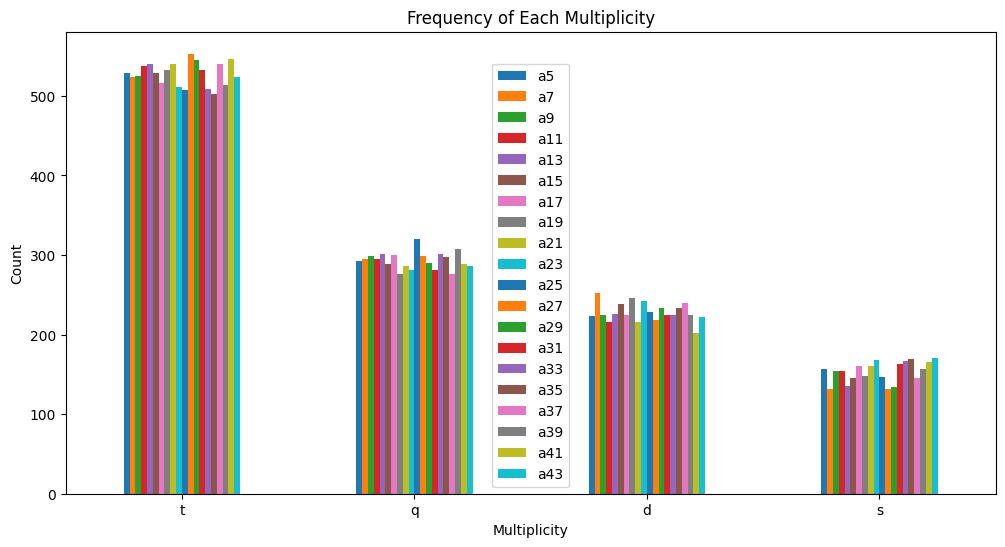

,a5,a7,a9,a11,a13,a15,a17,a19,a21,a23,a25,a27,a29,a31,a33,a35,a37,a39,a41,a43
t,529,524,525,537,540,529,516,532,540,511,507,553,545,533,509,503,540,514,546,524
q,293,295,299,295,301,289,300,276,286,281,320,299,290,281,301,297,276,307,289,286
d,223,252,224,216,226,239,225,246,216,242,228,218,233,225,225,233,240,224,202,222
s,157,131,154,154,135,145,161,148,160,168,147,132,134,163,167,169,146,157,165,170


In [10]:
multiplicity_counts = multiplicities.apply(pd.Series.value_counts, axis=0).fillna(0)

plt.figure(figsize=(12, 6))
multiplicity_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Each Multiplicity')
plt.xlabel('Multiplicity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

display(multiplicity_counts)

2-3. Scatter Plot of Frequencies vs Multiplicities

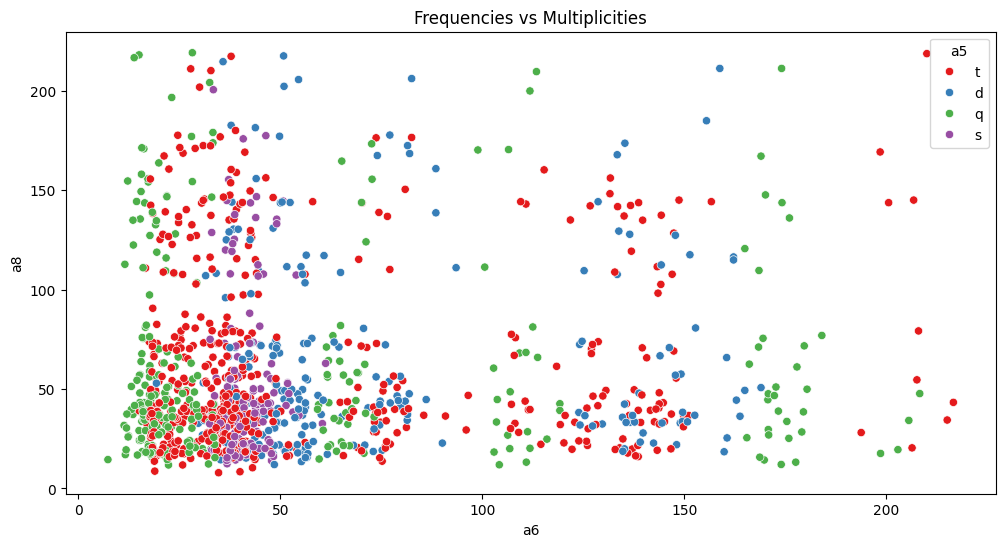

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=frequencies.iloc[:, 0], y=frequencies.iloc[:, 1], hue=multiplicities.iloc[:, 0], palette='Set1')
plt.title('Frequencies vs Multiplicities')
plt.xlabel('a6')
plt.ylabel('a8')
plt.show()

#### 3. Machine Learning Algorithm

3-1. Random Forest

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

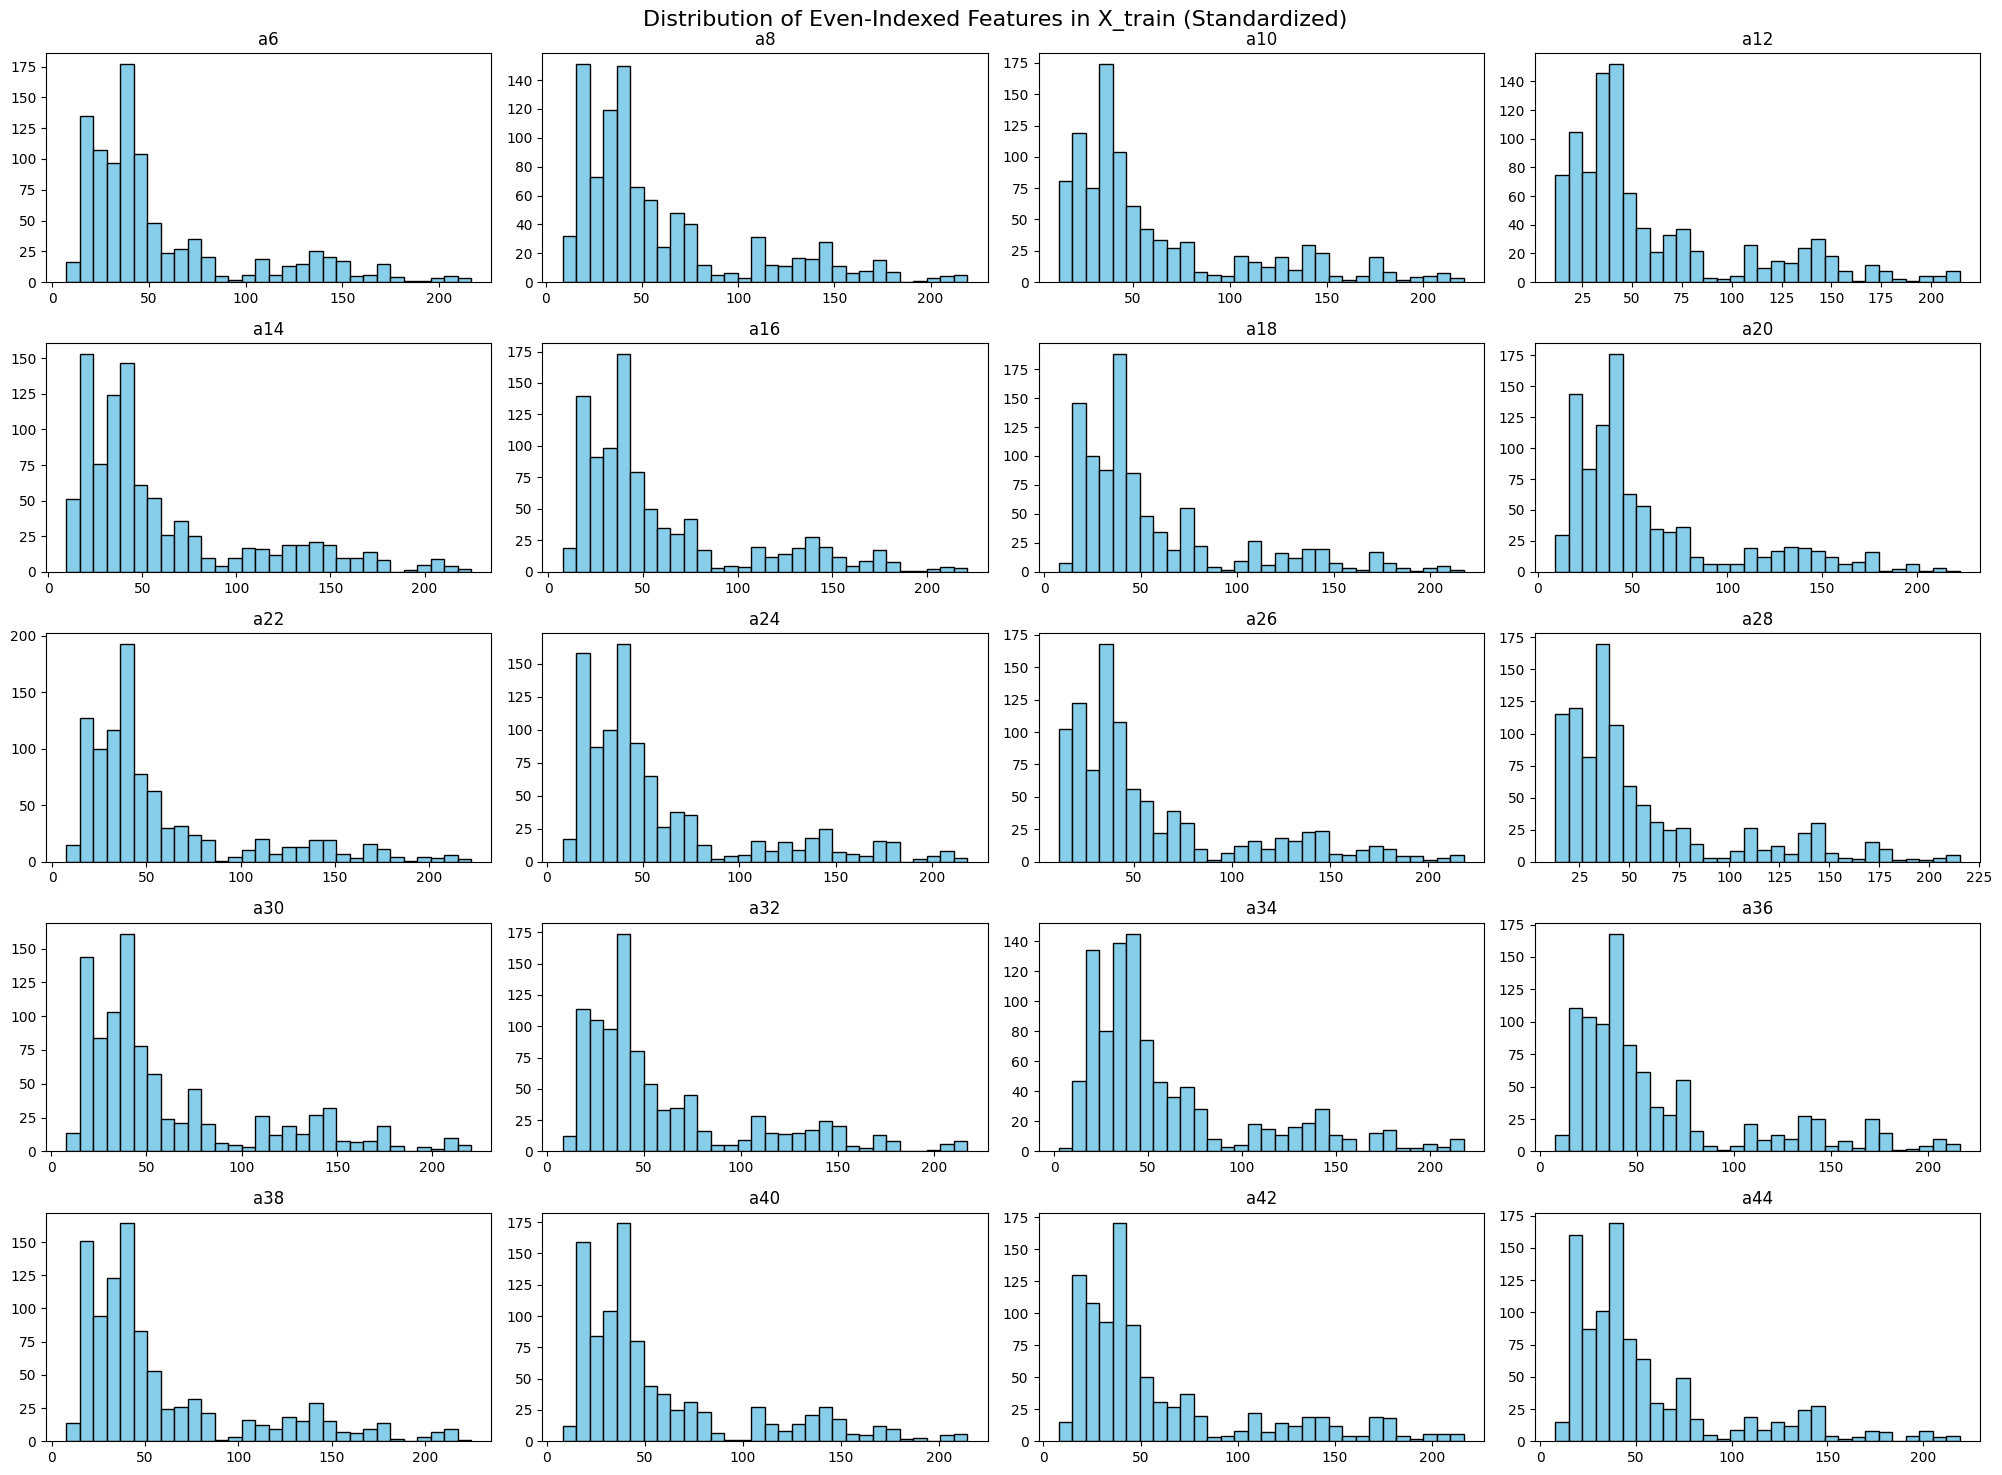

In [11]:
label_encoder = LabelEncoder()
odd_columns = Data.columns[1::2]
odd_columns = odd_columns[:-1]

Data_numeric = Data.copy()
for col in odd_columns:
    Data_numeric[col] = label_encoder.fit_transform(Data[col])

X = Data_numeric.drop(columns=[Data.columns[0], Data.columns[-1]])
y = Data_numeric[Data_numeric.columns[-1]]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Visualization
X_train_df = pd.DataFrame(X_train, columns=X.columns)
even_columns = X_train_df.iloc[:, 1::2]
even_columns.hist(bins=30, figsize=(20, 15), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Even-Indexed Features in X_train (Standardized)', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")

best_gb_model = random_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

unique_classes = np.unique(np.concatenate((y_test, y_pred)))
target_names = label_encoder.inverse_transform(unique_classes)
print(classification_report(y_test, y_pred, target_names=target_names))

/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}
              precision    recall  f1-score   support

         18c       0.25      0.25      0.25         4
         22c       0.33      0.10      0.15        21
         28c       0.00      0.00      0.00         1
          2c       0.00      0.00      0.00         1
         31c       0.00      0.00      0.00         0
         33c       0.00      0.00      0.00         2
         36c       0.00      0.00      0.00         2
          3c       0.64      0.65      0.65        63
         47c       0.00      0.00      0.00         2
          4c       0.00      0.00      0.00        18
         52c       0.46      0.65      0.54        63
         54c       0.50      0.49      0.50        53
          5c       0.00      0.00      0.00         8
         60c       0.00      0.00      0.00         0
         71c       0.00      0.00      0.00         1
     

/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/env

3-2. SVC

In [5]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Algorithm
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

# Normalization of numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.32      0.38      0.35        86
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        24
          13       0.43      0.72      0.54       107
          14       0.47      0.43      0.45        87
          15       0.00      0.00      0.00        12
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2

    accuracy                           0.41       361
   macro avg       0.09      0.11      0.10       361
weighted avg       0.32      0.41      0.35       361



/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/TML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3-3. Algorithm 3

In [ ]:
# Import libraries

In [ ]:
# Algorithm